<a href="https://colab.research.google.com/github/pradhicsha6/Plant_Disease_Detection/blob/main/pdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 16 classes.


In [17]:
class_names = dataset.class_names
class_names

['.ipynb_checkpoints',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [18]:
len(dataset)

645

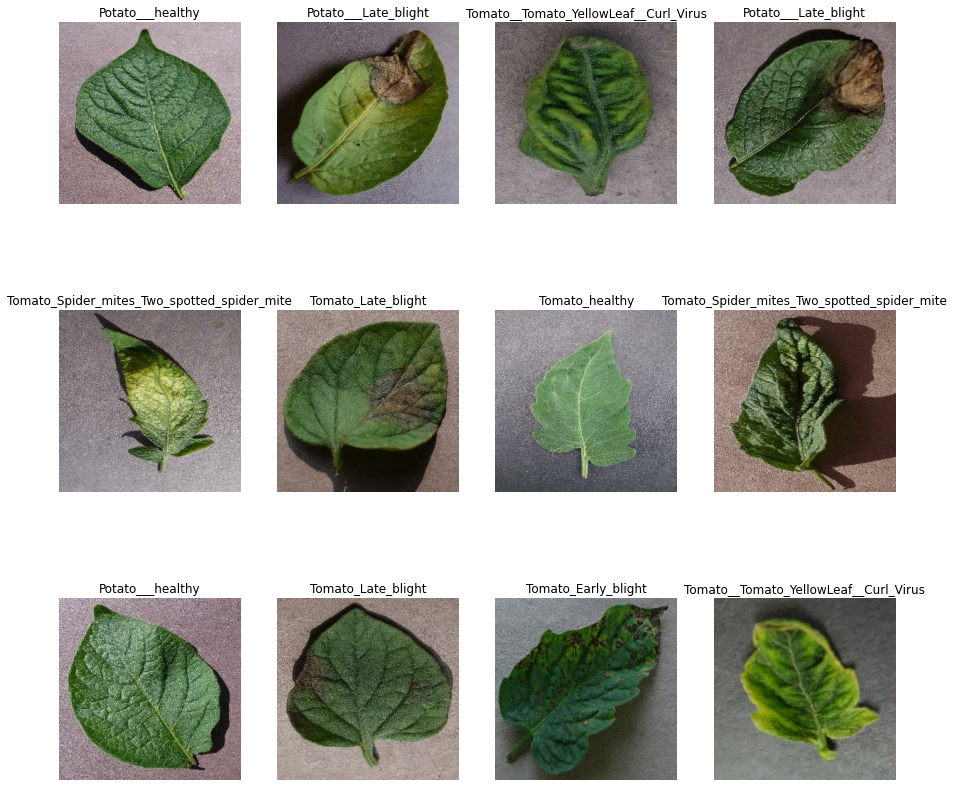

In [26]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [27]:
train_size = 0.8
len(dataset)*train_size

516.0

In [28]:
train_ds = dataset.take(516)
len(train_ds)

516

In [29]:
test_ds = dataset.skip(516)
len(test_ds)

129

In [30]:
val_size=0.1
len(dataset)*val_size

64.5

In [31]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [32]:
test_ds = test_ds.skip(64)
len(test_ds)

65

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000)   
    ds_size = len(ds)
     if shuffle:
         ds = ds.shuffle(shuffle_size, seed=10)
       train_size = int(train_split * ds_size)
       val_size = int(val_split * ds_size)
       train_ds = ds.take(train_size)
       val_ds = ds.skip(train_size).take(val_size)
       test_ds = ds.skip(train_size).skip(val_size)
       return train_ds,val_ds,test_ds


In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [33]:
len(train_ds)

516

In [34]:
len(val_ds)

64

In [35]:
len(test_ds)

65

In [36]:
len(dataset)

645

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical" ),
    layers.experimental.preprocessing.RandomRotation(0.2),
])